In [6]:
import os
import numpy as np
import networkx as nx
from tqdm import tqdm
from matplotlib import animation
from matplotlib import pyplot as plt

In [2]:
# Create a Barabasi-Albert Network
# 15 Nodes
#  2 Degree
brb = nx.generators.random_graphs.barabasi_albert_graph(15, 2)

In [3]:
def animate(num, G, ax, pos):
    ax.clear()
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-1.1, 1.1)

    index = range(num)
    H = G.subgraph(index)
    new_pos = {coor:pos[coor] for coor in index}
    nx.draw(H, pos=new_pos, ax=ax, with_labels=True, node_color='lightblue')

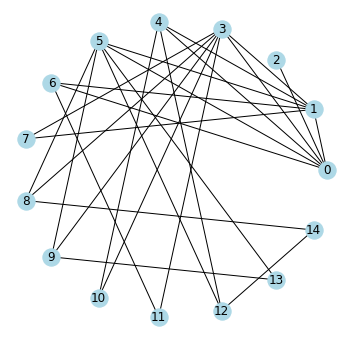

In [5]:
# Build plot
fig, ax = plt.subplots(figsize=(6, 6))

# Network base-end values
n_nodes = brb.number_of_nodes()
pos = nx.circular_layout(brb)

# Make Animation
ani = animation.FuncAnimation(fig, animate, frames=range(1, n_nodes+1),
                                interval=500, fargs=(brb, ax, pos))

# Save Animation as a GIF
folder_path = os.path.join(os.path.abspath(''), '..', 'Reports', 'Figures')
filename = os.path.join(folder_path, 'barabasi_gen_1.gif')
ani.save(filename, writer='pillow')

plt.show()

In [7]:
## Network for Methods Comparison
# Amount of networks to generate
nets = 50

# Generation Options
nodes = 10000
edges = 2

# Networks
graphs = []

for net in range(nets):
    G = nx.generators.random_graphs.barabasi_albert_graph(nodes, edges)
    graphs += [G]

In [8]:
# Get average degree
avg_degree = np.zeros((nodes, nodes))
for idx, G in tqdm(enumerate(graphs)):
    # Degrees through time
    degrees_t = np.zeros((nodes, nodes))
    for num, t in enumerate(degrees_t):
        index = range(num+1)
        H = G.subgraph(index)
        degrees_sub = np.fromiter(dict(nx.degree(H)).values(), dtype=int)
        degrees_t[num] = np.pad(degrees_sub, (0, nodes - num - 1), 'constant', constant_values=0)
    avg_degree += degrees_t
avg_degree /= nets

0it [00:00, ?it/s]

Graph 0


1it [06:33, 393.55s/it]

Graph 1


2it [12:04, 356.70s/it]

Graph 2


3it [17:19, 337.66s/it]

Graph 3


4it [22:41, 331.61s/it]

Graph 4


4it [30:05, 451.42s/it]


KeyboardInterrupt: 

In [ ]:
# Set File Name
folder_path = os.path.join(os.path.abspath(''), '..', 'Data', 'Generated', 'Barabasi')
save_path = os.path.join(folder_path, 'Avg_Network_50.npy')

# Save the network for later analysis
with open(save_path, 'wb') as f:
    np.save(f, avg_degree)